In [1]:
from luwiji.knn import illustration, demo

In [2]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

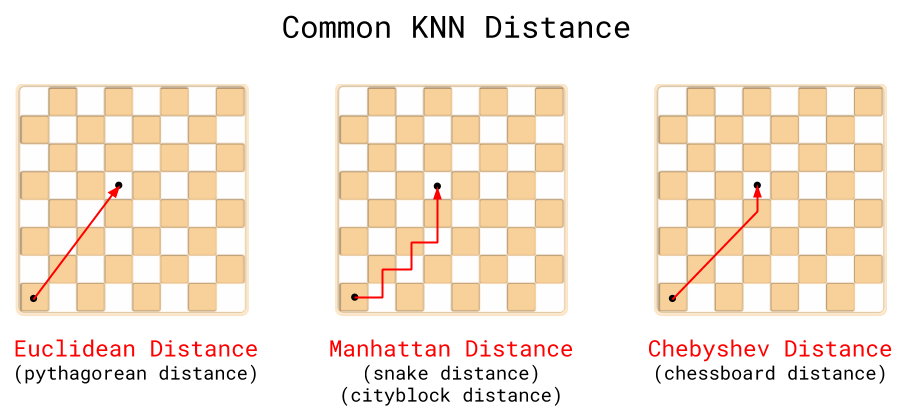

In [3]:
illustration.knn_distance

### Other Distance Metric

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from luwiji.knn import illustration

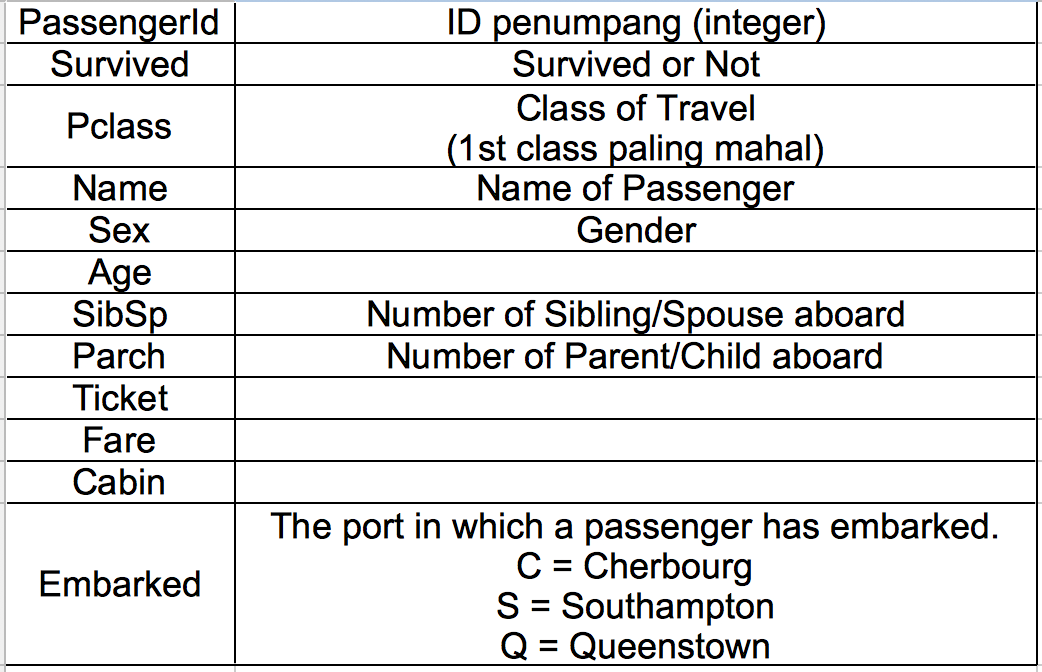

In [43]:
illustration.nomenklatur

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1 = df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

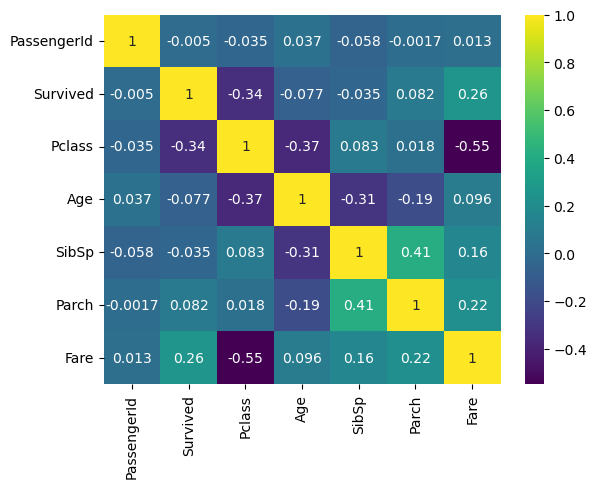

In [7]:
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

In [8]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df1.set_index('PassengerId', inplace=True)


In [10]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df1.drop(columns=['Age', 'Cabin'], inplace=True)

In [12]:
df1.drop(columns=['Name'], inplace=True)
df1.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,1,0,A/5 21171,7.2500,S
2,1,1,female,1,0,PC 17599,71.2833,C
3,1,3,female,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,1,0,113803,53.1000,S
5,0,3,male,0,0,373450,8.0500,S


In [13]:
df1.Embarked.fillna('S', inplace=True)

<AxesSubplot:ylabel='PassengerId'>

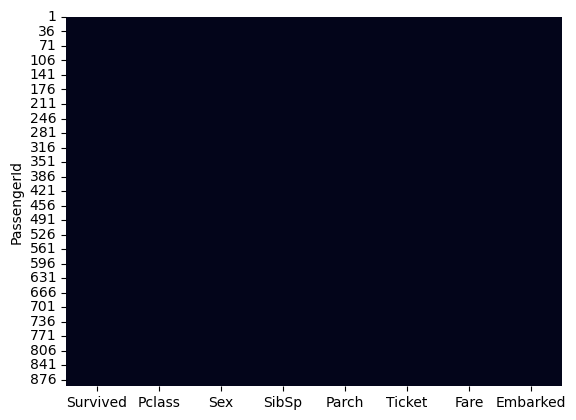

In [14]:
sns.heatmap(df1.isna(), cbar=False)

In [15]:
df1 = pd.get_dummies(df1, columns=['Pclass', 'Sex', 'Embarked'])

In [16]:
df1.head()

,Survived,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
2,1,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
3,1,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
4,1,1,0,113803,53.1000,1,0,0,1,0,0,0,1
5,0,0,0,373450,8.0500,0,0,1,0,1,0,0,1


<AxesSubplot:>

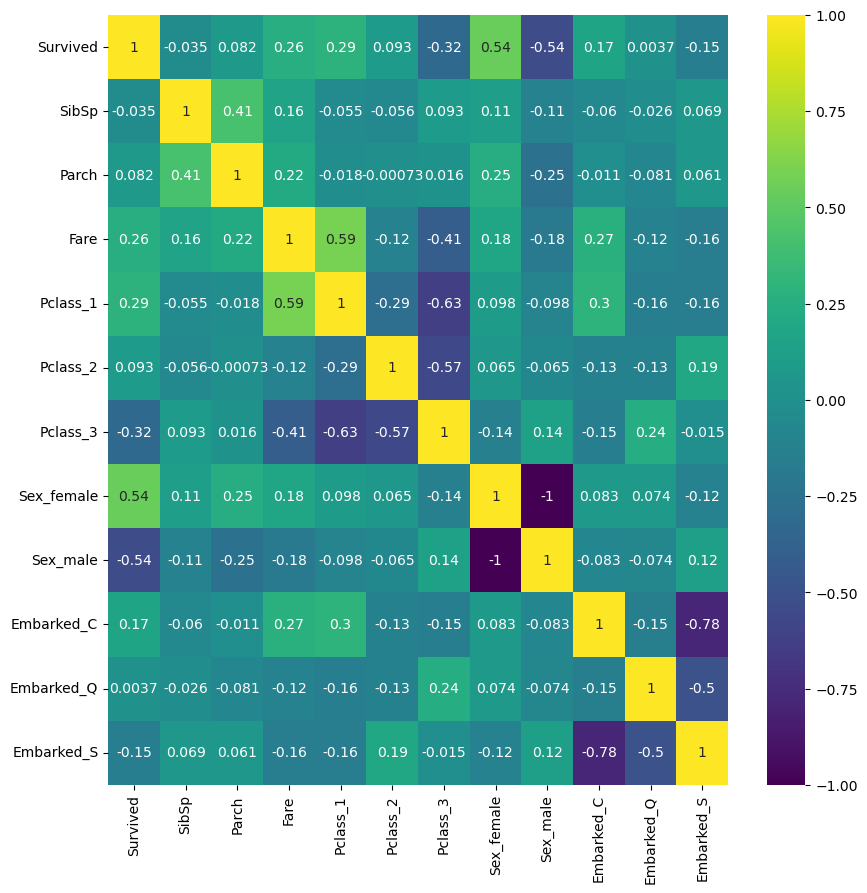

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

In [24]:
df1.drop(columns=['Ticket'], inplace=True)

In [30]:
x = df1.drop(columns=['Survived'])
y = df1['Survived']


PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
res = cross_val_score(knn, x, y, cv=5)
res

array([0.65363128, 0.75280899, 0.80898876, 0.75842697, 0.78089888])

In [33]:
res_mean = res.mean()
res_mean

0.7509509760843638